# Bayesian network for credit-worthiness

> An example of a Bayesian network for credit-worthiness.

> [https://github.com/zsxoff/bayessian-network-credit](https://github.com/zsxoff/bayessian-network-credit)

This is an example of creating a Bayesian network for credit-worthiness.

Example taken from the [Probabilistic Graphical Models Specialization](https://www.coursera.org/specializations/probabilistic-graphical-models)
presented by [Daphne Koller](https://ai.stanford.edu/~koller/).

---

## Import packages

In [1]:
import networkx as nx
import pygraphviz as pgv
from IPython.display import Image
from pgmpy.factors.discrete.CPD import TabularCPD
from pgmpy.inference import VariableElimination
from pgmpy.models import BayesianModel

## Visualizing the relationship of variables and adding your own variables

variables: ['Ability to work', 'Age', 'Assets', 'Credit-worthy', 'Employer', 'Future income', 'Income', 'Payment history', 'Penalties', 'Ratio of debts to income', 'Reliable']
unique variables count: 11


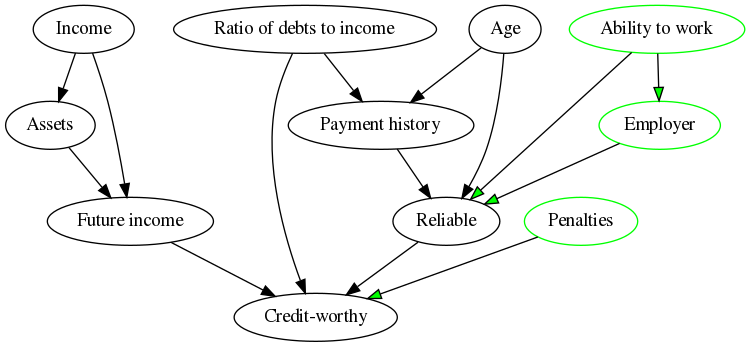

In [2]:
digraph = (
    ("Payment history", "Reliable"),
    ("Age", "Reliable"),
    ("Age", "Payment history"),
    ("Ratio of debts to income", "Payment history",),
    ("Income", "Assets"),
    ("Assets", "Future income"),
    ("Income", "Future income"),
    ("Reliable", "Credit-worthy"),
    ("Future income", "Credit-worthy"),
    ("Ratio of debts to income", "Credit-worthy",),
)

# Adding your own variables.

additional = (
    ("Ability to work", "Reliable"),
    ("Ability to work", "Employer"),
    ("Employer", "Reliable"),
    ("Penalties", "Credit-worthy"),
)

digraph += additional


variables = set(list(x for pair in digraph for x in pair))

print("variables:", sorted(list(variables)))
print("unique variables count:", len(variables))

# Plot graph.

G = pgv.AGraph(directed=True)

for element in digraph:
    G.add_edge(element[0], element[1])

# Colorize additional values.

for element in additional:
    G.get_edge(element[0], element[1]).attr["fillcolor"] = "green"
    G.get_node(element[0]).attr["color"] = "green"

Image(G.draw(format="png", prog="dot"))

## Define Bayesian Model

In [3]:
model = BayesianModel(digraph)

### Root

#### Ability to work

In [4]:
cpd = TabularCPD(
    variable="Ability to work",
    variable_card=2,
    values=[
        # probability
        [0.2],
        [0.8],
    ],
)
model.add_cpds(cpd)
print(cpd)

+--------------------+-----+
| Ability to work(0) | 0.2 |
+--------------------+-----+
| Ability to work(1) | 0.8 |
+--------------------+-----+


#### Age

In [5]:
cpd = TabularCPD(
    variable="Age",
    variable_card=3,
    values=[
        # probability
        [0.1],
        [0.4],
        [0.5],
    ],
)
model.add_cpds(cpd)
print(cpd)

+--------+-----+
| Age(0) | 0.1 |
+--------+-----+
| Age(1) | 0.4 |
+--------+-----+
| Age(2) | 0.5 |
+--------+-----+


#### Income

In [6]:
cpd = TabularCPD(
    variable="Income",
    variable_card=3,
    values=[
        # probability
        [0.3],
        [0.4],
        [0.3],
    ],
)
model.add_cpds(cpd)
print(cpd)

+-----------+-----+
| Income(0) | 0.3 |
+-----------+-----+
| Income(1) | 0.4 |
+-----------+-----+
| Income(2) | 0.3 |
+-----------+-----+


#### Penalties

In [7]:
cpd = TabularCPD(
    variable="Penalties",
    variable_card=2,
    values=[
        # probability
        [0.8],
        [0.2],
    ],
)
model.add_cpds(cpd)
print(cpd)

+--------------+-----+
| Penalties(0) | 0.8 |
+--------------+-----+
| Penalties(1) | 0.2 |
+--------------+-----+


#### Ratio of debts to income

In [8]:
cpd = TabularCPD(
    variable="Ratio of debts to income",
    variable_card=2,
    values=[
        # probability
        [0.5],
        [0.5],
    ],
)
model.add_cpds(cpd)
print(cpd)

+-----------------------------+-----+
| Ratio of debts to income(0) | 0.5 |
+-----------------------------+-----+
| Ratio of debts to income(1) | 0.5 |
+-----------------------------+-----+


### Internal

#### Assets

In [9]:
cpd = TabularCPD(
    variable="Assets",
    variable_card=3,
    values=[
        # probability
        [0.7, 0.1, 0.1],
        [0.2, 0.7, 0.2],
        [0.1, 0.2, 0.7],
    ],
    evidence=["Income"],
    evidence_card=[3],
)
model.add_cpds(cpd)
print(cpd)

+-----------+-----------+-----------+-----------+
| Income    | Income(0) | Income(1) | Income(2) |
+-----------+-----------+-----------+-----------+
| Assets(0) | 0.7       | 0.1       | 0.1       |
+-----------+-----------+-----------+-----------+
| Assets(1) | 0.2       | 0.7       | 0.2       |
+-----------+-----------+-----------+-----------+
| Assets(2) | 0.1       | 0.2       | 0.7       |
+-----------+-----------+-----------+-----------+


#### Employer

In [10]:
cpd = TabularCPD(
    variable="Employer",
    variable_card=2,
    values=[
        # probability
        [0.5, 0.5],
        [0.5, 0.5],
    ],
    evidence=["Ability to work"],
    evidence_card=[2],
)
model.add_cpds(cpd)
print(cpd)

+-----------------+--------------------+--------------------+
| Ability to work | Ability to work(0) | Ability to work(1) |
+-----------------+--------------------+--------------------+
| Employer(0)     | 0.5                | 0.5                |
+-----------------+--------------------+--------------------+
| Employer(1)     | 0.5                | 0.5                |
+-----------------+--------------------+--------------------+


#### Future income

In [11]:
cpd = TabularCPD(
    variable="Future income",
    variable_card=2,
    values=[
        # probability
        [0.8, 0.7, 0.6, 0.7, 0.6, 0.5, 0.6, 0.5, 0.4],
        [0.2, 0.3, 0.4, 0.3, 0.4, 0.5, 0.4, 0.5, 0.6],
    ],
    evidence=["Assets", "Income"],
    evidence_card=[3, 3],
)
model.add_cpds(cpd)
print(cpd)

+------------------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+
| Assets           | Assets(0) | Assets(0) | Assets(0) | Assets(1) | Assets(1) | Assets(1) | Assets(2) | Assets(2) | Assets(2) |
+------------------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+
| Income           | Income(0) | Income(1) | Income(2) | Income(0) | Income(1) | Income(2) | Income(0) | Income(1) | Income(2) |
+------------------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+
| Future income(0) | 0.8       | 0.7       | 0.6       | 0.7       | 0.6       | 0.5       | 0.6       | 0.5       | 0.4       |
+------------------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+
| Future income(1) | 0.2       | 0.3       | 0.4       | 0.3       | 0.4       | 0.5       | 0.4 

#### Payment history

In [12]:
cpd = TabularCPD(
    variable="Payment history",
    variable_card=3,
    values=[
        # probability
        [0.7, 0.5, 0.5, 0.3, 0.5, 0.1],
        [0.2, 0.3, 0.3, 0.4, 0.3, 0.4],
        [0.1, 0.2, 0.2, 0.3, 0.2, 0.5],
    ],
    evidence=["Age", "Ratio of debts to income"],
    evidence_card=[3, 2],
)
model.add_cpds(cpd)

# too big for print.
# print(cpd)

#### Reliable

In [13]:
# fmt: off
cpd = TabularCPD(
    variable="Reliable",
    variable_card=2,
    values=[
        [1.0, 0.95, 0.9, 0.9, 0.8, 0.7, 0.8, 0.7, 0.6, 1.0, 0.95, 0.9, 0.8, 0.7, 0.6, 0.7, 0.6, 0.5, 1.0, 0.95, 0.9, 0.9, 0.8, 0.7, 0.8, 0.7, 0.6, 1.0, 0.9, 0.8, 0.9, 0.7, 0.5, 0.8, 0.5, 0.2,],
        [0.0, 0.05, 0.1, 0.1, 0.2, 0.3, 0.2, 0.3, 0.4, 0.0, 0.05, 0.1, 0.2, 0.3, 0.4, 0.3, 0.4, 0.5, 0.0, 0.05, 0.1, 0.1, 0.2, 0.3, 0.2, 0.3, 0.4, 0.0, 0.1, 0.2, 0.1, 0.3, 0.5, 0.2, 0.5, 0.8,],
    ],
    evidence=["Ability to work", "Employer", "Age", "Payment history"],
    evidence_card=[2, 2, 3, 3],
)
# fmt: on

model.add_cpds(cpd)

# too big for print.
# print(cpd)

### leaf

#### Credit-worthy

In [14]:
cpd = TabularCPD(
    variable="Credit-worthy",
    variable_card=2,
    values=[
        # probability
        [0.9, 1.0, 0.85, 0.95, 0.8, 0.9, 0.7, 0.85, 0.6, 0.7, 0.5, 0.65, 0.2, 0.6, 0.1, 0.5],
        [0.1, 0.0, 0.15, 0.05, 0.2, 0.1, 0.3, 0.15, 0.4, 0.3, 0.5, 0.35, 0.8, 0.4, 0.9, 0.5],
    ],
    evidence=["Future income", "Reliable", "Ratio of debts to income", "Penalties"],
    evidence_card=[2, 2, 2, 2],
)
model.add_cpds(cpd)

# too big for print.
# print(cpd)

## Check model

From documentation: [https://pgmpy.org/models.html#pgmpy.models.BayesianModel.BayesianModel.check_model](https://pgmpy.org/models.html#pgmpy.models.BayesianModel.BayesianModel.check_model)

Check the model for various errors. This method checks for the following errors.

* Checks if the sum of the probabilities for each state is equal to 1 (tol=0.01).
* Checks if the CPDs associated with nodes are consistent with their parents.

Returns: check – True if all the checks are passed

In [15]:
model.check_model()

True

## Probability of Credit-worthy

Compute the probability of Credit-worthy by marginalizing over all the other variables:

In [16]:
inference = VariableElimination(model)

probability = inference.query(["Credit-worthy"], show_progress=False)

print(probability)

+------------------+----------------------+
| Credit-worthy    |   phi(Credit-worthy) |
+==================+======================+
| Credit-worthy(0) |               0.7029 |
+------------------+----------------------+
| Credit-worthy(1) |               0.2971 |
+------------------+----------------------+


## Visualize all probabilities

***Not perfect*** quick visualization:

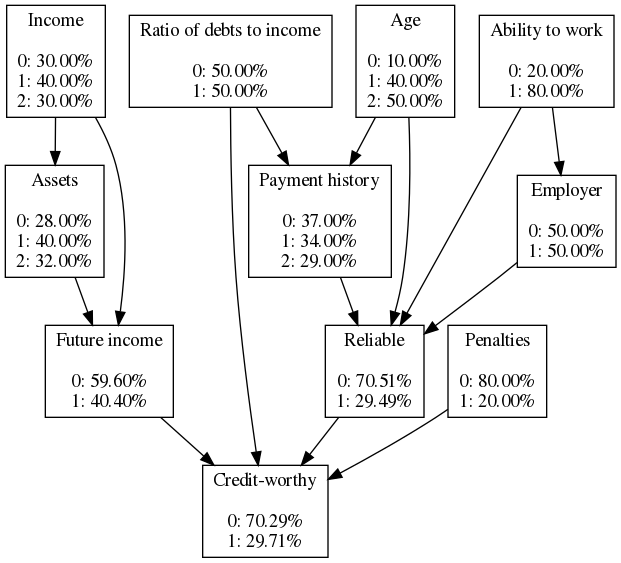

In [17]:
G = pgv.AGraph(directed=True)

for element in digraph:

    probability_0 = inference.query([element[0]], show_progress=False)
    probability_1 = inference.query([element[1]], show_progress=False)

    probability_0_str = "\n".join(
        [f"{k}: {x * 100:.02f}%" for k, x in enumerate(probability_0.values)]
    )
    probability_1_str = "\n".join(
        [f"{k}: {x * 100:.02f}%" for k, x in enumerate(probability_1.values)]
    )

    G.add_node(element[0], label=element[0] + "\n\n" + probability_0_str)
    G.add_node(element[1], label=element[1] + "\n\n" + probability_1_str)

    G.get_node(element[0]).attr["shape"] = "box"
    G.get_node(element[1]).attr["shape"] = "box"

    G.add_edge(element[0], element[1])

Image(G.draw(format="png", prog="dot"))